## K means Clustering

In [68]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
%matplotlib inline

In [69]:
x=np.random.rand(500,2)
y=np.random.rand(500,2)

In [70]:
x1,y1=make_blobs(n_samples=100,n_features=2,centers=3,random_state=42)

In [71]:
x.shape

(500, 2)

In [72]:
y.shape

(500, 2)

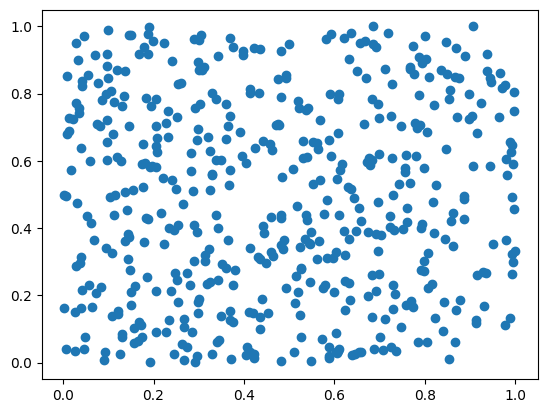

In [73]:
plt.scatter(x[:,0],x[:,1])

In [74]:
from sklearn.model_selection import train_test_split


In [75]:
X_train,X_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [76]:
from sklearn.cluster import KMeans

In [77]:
wcss=list()
for k in range(1,11):
    KMean=KMeans(n_clusters=k,init='k-means++')
    KMean.fit(X_train)
    wcss.append(KMean.inertia_)


In [78]:
wcss

[67.80440364763481,
 40.733940151178814,
 24.80210390697824,
 15.835068779351662,
 13.528380650755029,
 11.781522614837193,
 9.742792950829886,
 8.171168858157632,
 7.3445291754861275,
 6.5923383890485425]

([<matplotlib.axis.XTick at 0x266ff09ffb0>,
 [Text(1, 0, '1'),
  Text(2, 0, '2'),
  Text(3, 0, '3'),
  Text(4, 0, '4'),
  Text(5, 0, '5'),
  Text(6, 0, '6'),
  Text(7, 0, '7'),
  Text(8, 0, '8'),
  Text(9, 0, '9'),
  Text(10, 0, '10')])

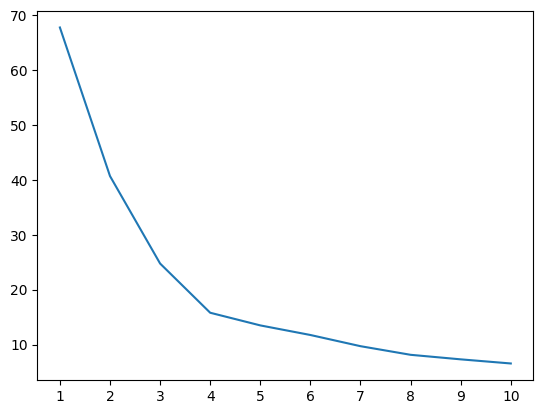

In [79]:
plt.plot(range(1,11),wcss)
plt.xticks(range(1,11))

In [80]:
kean=KMeans(n_clusters=4,init='k-means++')

In [81]:
y_labels=kean.fit_predict(X_train)

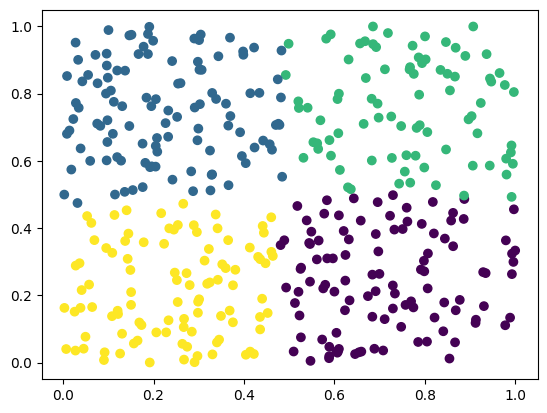

In [82]:
plt.scatter(X_train[:,0],X_train[:,1],c=y_labels)

In [83]:
y_test_labels=kean.predict(X_test)

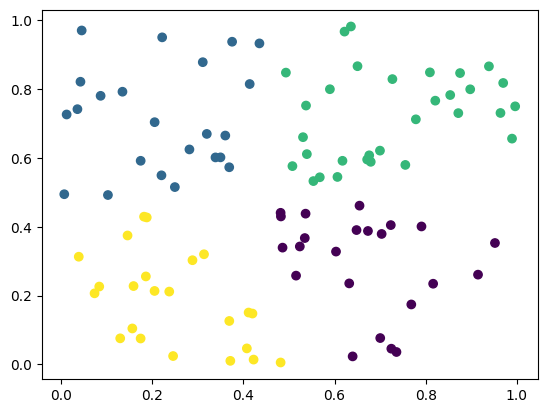

In [84]:
plt.scatter(X_test[:,0],X_test[:,1],c=y_test_labels)

In [86]:
pip install kneed

Note: you may need to restart the kernel to use updated packages.


In [87]:
from kneed import KneeLocator

In [92]:
k1=KneeLocator(range(1,11),wcss,curve="convex",direction="decreasing")
k1.elbow

4

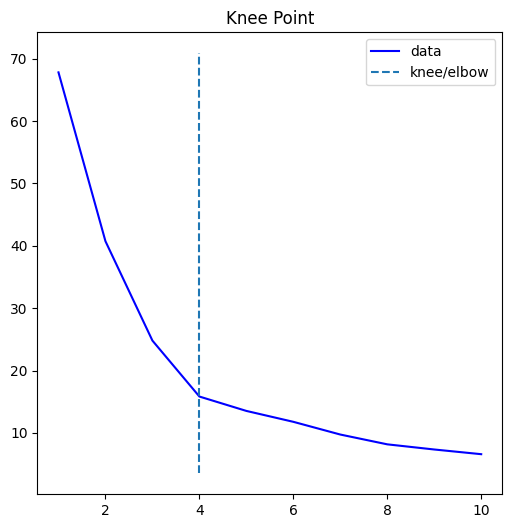

In [97]:
k1.plot_knee()

In [98]:
from sklearn.metrics import silhouette_score

In [100]:
silhoutee_coeff=list()
for k in range(2,11):
    kmean_=KMeans(n_clusters=k,init="k-means++")
    kmean_.fit(X_train)
    score=silhouette_score(X_train,kmean_.labels_)
    silhoutee_coeff.append(score)

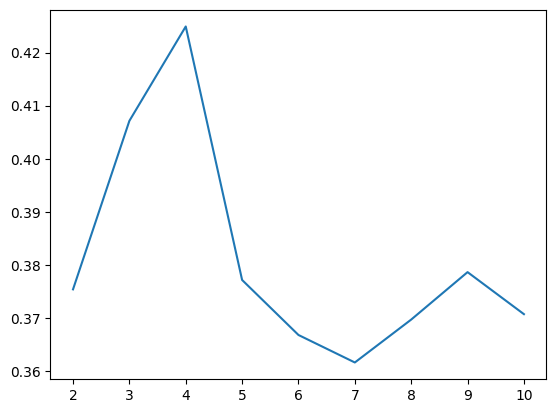

In [104]:
plt.plot(range(2,11),silhoutee_coeff)